In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
import press_start_wrangle
from sklearn.cluster import KMeans

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_seq_items = 2000

# Acquire and Prepare the Data

In [2]:
games = press_start_wrangle.acquire_and_prep()

In [3]:
games.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'combined_sales',
       'over_five_mill', 'age_bins_middle_aged', 'age_bins_noob',
       'platform_3DS', 'platform_DC', 'platform_DS', 'platform_GB',
       'platform_GBA', 'platform_GC', 'platform_GEN', 'platform_N64',
       'platform_NES', 'platform_PC', 'platform_PS', 'platform_PS2',
       'platform_PS3', 'platform_PS4', 'platform_PSP', 'platform_PSV',
       'platform_SAT', 'platform_SCD', 'platform_SNES', 'platform_Wii',
       'platform_WiiU', 'platform_X360', 'platform_XB', 'platform_XOne',
       'genre_Adventure', 'genre_Fighting', 'genre_Misc', 'genre_Platform',
       'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Shooter',
       'genre_Simulation', 'genre_Sports', 'genre_Strategy',
       'publisher_505 Games', 'publisher_989 Studios', 'publisher_ASC Games',
       'publisher_ASCII Entertainment', 'publisher_Acclaim Entertainment',
       'pu

# Split the Data

In [4]:
train, validate, test = press_start_wrangle.split_data(games)

In [5]:
train.shape, validate.shape, test.shape

((1136, 146), (488, 146), (407, 146))

# Plot Boxplots for Qualitative Data

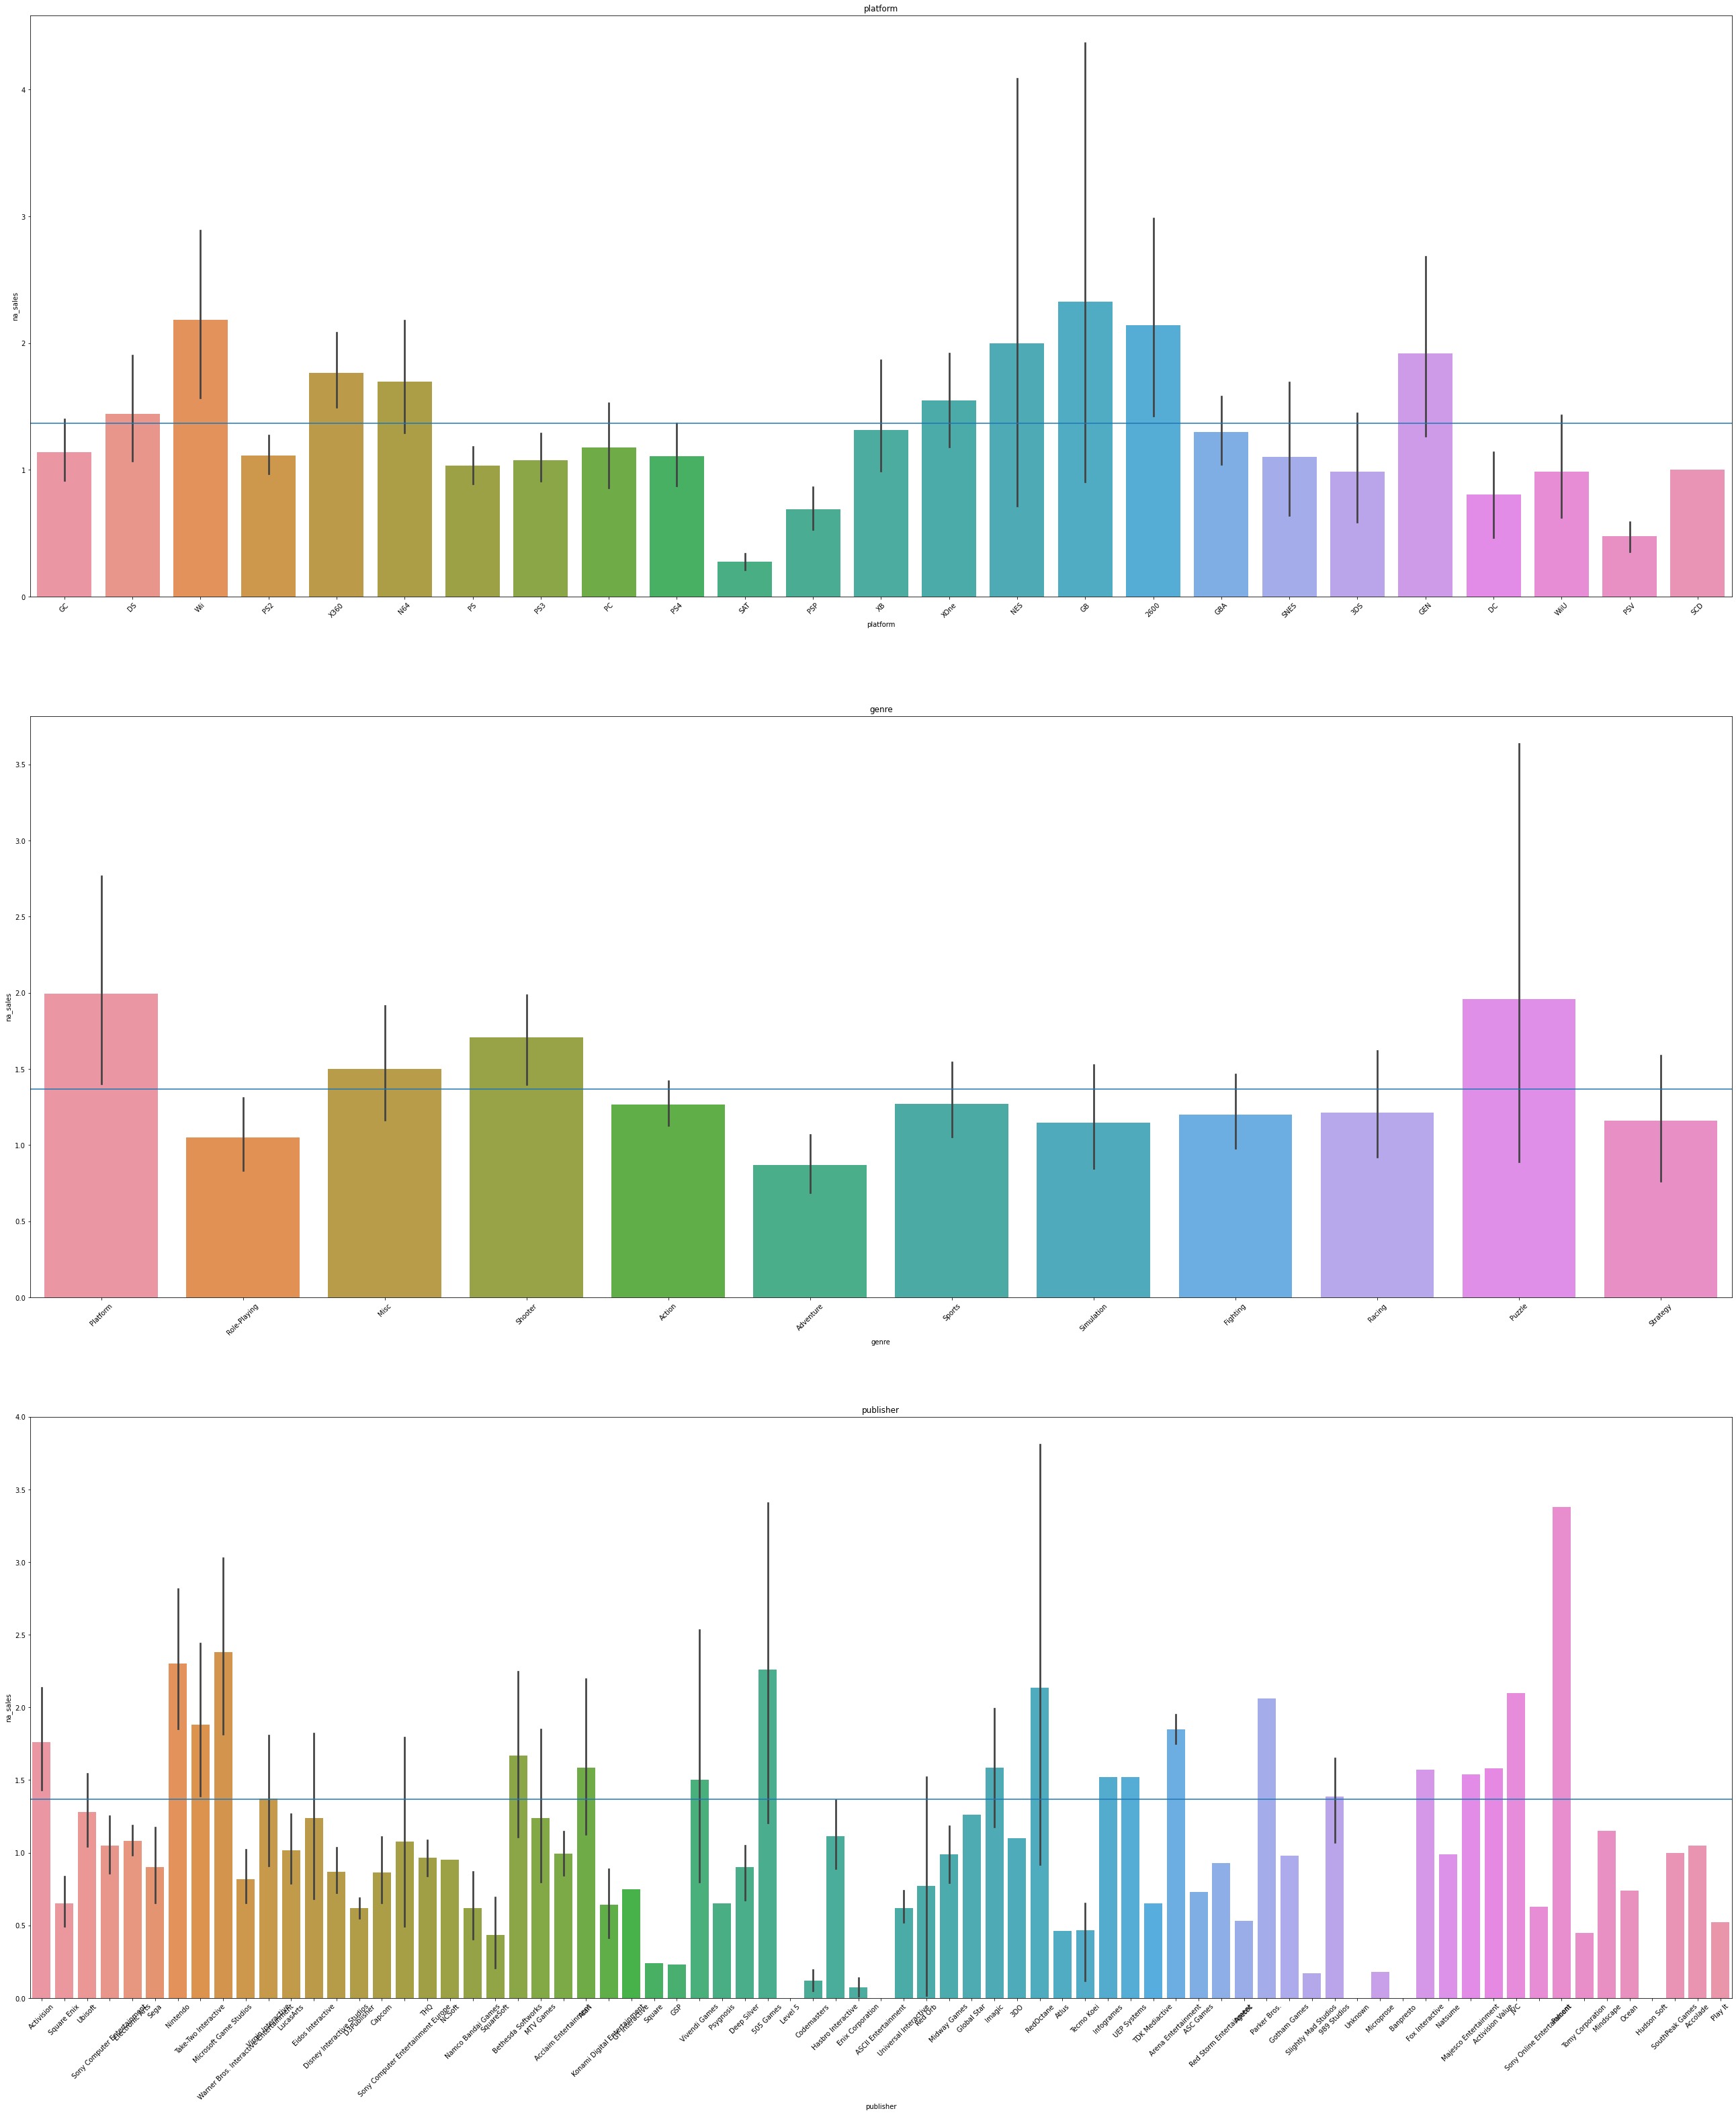

In [6]:
press_start_wrangle.qualitative_boxplot(train)

# Run Statistical Tests on Top Performing Publishers

In [7]:
press_start_wrangle.qualitative_stats_test(train)

2.112860117006087 0.018772802726588284
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.
3.5460895289171726 0.00024479672795653585
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Nintendo's average sales are greater than the population average.
1.9029818253077373 0.03124044531412377
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Take-Two Interactive's average sales are greater than the population average.
3.133044985794307 0.0018082964891023732
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Microsoft Game Studios's average sales are greater than the population average.
1.0086631127134522 0.16740457357043442
We reject the null hypothesis. There is sufficient evidence to move forward with the understa

In [8]:
train

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,combined_sales,...,publisher_Unknown,publisher_Valve,publisher_Valve Software,publisher_Video System,publisher_Virgin Interactive,publisher_Vivendi Games,publisher_Warner Bros. Interactive Entertainment,publisher_Westwood Studios,publisher_Zoo Digital Publishing,publisher_Zoo Games
2030,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,0.30,...,0,0,0,0,0,0,0,0,0,0
1329,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.34,...,0,0,0,0,0,0,0,0,0,0
1670,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,0.69,...,0,0,0,0,0,0,0,0,0,0
961,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,0.92,...,0,0,0,0,0,0,0,0,0,0
1228,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,0.58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,0.96,...,0,0,0,0,0,0,0,0,0,0
1330,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,0.07,...,0,0,0,0,0,0,0,0,0,0
1961,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,0.54,...,0,0,0,0,0,0,0,0,0,0
909,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.16,...,0,0,0,0,0,0,0,0,0,0


# Scale the Data Using Robust Scaler

In [9]:
X_train, X_validate, X_test, X_train_scaled, X_validate_scaled, X_test_scaled = press_start_wrangle.scale_data_using_robust(train, validate, test)

In [10]:
# Create variables that hold values for the target.
y_train = pd.DataFrame(train.na_sales)
y_validate = pd.DataFrame(validate.na_sales)
y_test = pd.DataFrame(test.na_sales)

# Set Baseline

In [11]:
press_start_wrangle.get_baseline(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  1.89 
Validate/Out-of-Sample:  1.73
RMSE using Median
Train/In-Sample:  1.95 
Validate/Out-of-Sample:  1.76


In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [13]:
X_train_scaled.drop(columns='na_sales', inplace=True)

In [14]:
X_validate_scaled.drop(columns='na_sales', inplace=True)

In [15]:
X_test_scaled.drop(columns='na_sales', inplace=True)

In [16]:
X_train_scaled.shape

(1136, 140)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

#Initializing RFE model, with parameter to select top 10 features. 
rfe = RFE(model, 50)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)

mask = rfe.support_
rfe_features = X_train_scaled.loc[:,mask].columns.tolist()

print(rfe_features)

['over_five_mill', 'age_bins_middle_aged', 'age_bins_noob', 'platform_3DS', 'platform_DC', 'platform_DS', 'platform_GBA', 'platform_GC', 'platform_N64', 'platform_NES', 'platform_PC', 'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PSP', 'platform_PSV', 'platform_SAT', 'platform_SCD', 'platform_SNES', 'platform_WiiU', 'platform_XB', 'publisher_505 Games', 'publisher_989 Studios', 'publisher_ASCII Entertainment', 'publisher_Agetec', 'publisher_Banpresto', 'publisher_Capcom', 'publisher_Codemasters', 'publisher_Enix Corporation', 'publisher_Global Star', 'publisher_Hudson Soft', 'publisher_JVC', 'publisher_Konami Digital Entertainment', 'publisher_Level 5', 'publisher_Majesco Entertainment', 'publisher_Microprose', 'publisher_Namco Bandai Games', 'publisher_Ocean', 'publisher_Palcom', 'publisher_Play It', 'publisher_Red Orb', 'publisher_RedOctane', 'publisher_Slightly Mad Studios', 'publisher_Square', 'publisher_SquareSoft', 'publisher_Tecmo Koei', 'publisher_Tomy Corporation', 

In [18]:
X_train_scaled_rfe = X_train_scaled[rfe_features]
X_validate_scaled_rfe = X_validate_scaled[rfe_features]
X_test_rfe = X_test_scaled[rfe_features]

In [19]:
X_train_scaled_rfe

,over_five_mill,age_bins_middle_aged,age_bins_noob,platform_3DS,platform_DC,platform_DS,platform_GBA,platform_GC,platform_N64,platform_NES,...,publisher_Red Orb,publisher_RedOctane,publisher_Slightly Mad Studios,publisher_Square,publisher_SquareSoft,publisher_Tecmo Koei,publisher_Tomy Corporation,publisher_UEP Systems,publisher_Universal Interactive,publisher_Unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled_rfe, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm'] = lm.predict(X_train_scaled_rfe)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm)**(1/2)

# predict validate
y_validate['na_sales_pred_lm'] = lm.predict(X_validate_scaled_rfe)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.18489600568807 
Validation/Out-of-Sample:  1.2402110350462479


## Vizualize my model's predictions compared to the baseline.

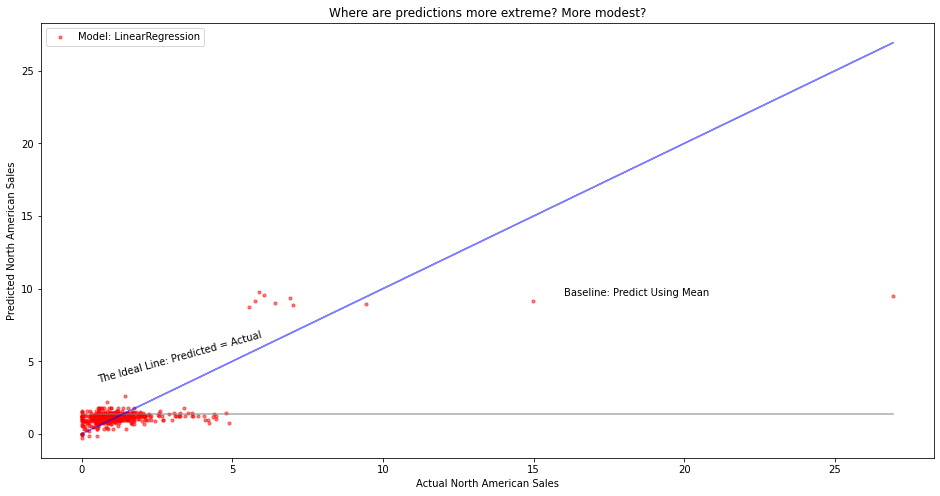

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.na_sales, y_validate.na_sales_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.na_sales, y_validate.na_sales, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_lm, 
            alpha=.5, color="red", s=10, label="Model: LinearRegression")

plt.legend()
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Takeaway

* I just put this in, but I did not have time to evaluate it.
* My model seems to beat baseline by a significant amount, but I will need more time to verify.

**Update**
* Okay, I see where I went wrong. I fed the target variable into my model. Ooops. I need to rerun the model without the target variable.



## New Update

* I removed the target variable from the list of features that I fed into the model. To my surprise my model outperformed the baseline by an amount that I am happy with for my first individual project. 
* As for my next steps, I am going to create clusters based on domain knowledge. After creating those clusters, I will run the recursive feature elimination method to see if any make it into the top five performing features. 

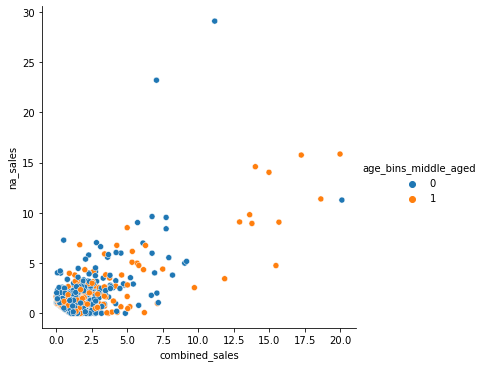

In [22]:
sns.relplot(x=train.combined_sales, y=train.na_sales, hue='age_bins_middle_aged', data=train)

# Let's run a statistical test to see how strong the correlation is between NA sales and the combined sales of all other countries.

In [23]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

### $H_0$: There is no correlation between combined sales and na_sales
### $H_a$: There is a correlation between combined sales and na_sales

In [24]:
corr, p = stats.pearsonr(train.combined_sales, train.na_sales)
corr, p

(0.6880210633006318, 4.2539203552132246e-160)

## Let's create some clusters that we think might be useful.

In [25]:
train.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'combined_sales',
       'over_five_mill', 'age_bins_middle_aged', 'age_bins_noob',
       'platform_3DS', 'platform_DC', 'platform_DS', 'platform_GB',
       'platform_GBA', 'platform_GC', 'platform_GEN', 'platform_N64',
       'platform_NES', 'platform_PC', 'platform_PS', 'platform_PS2',
       'platform_PS3', 'platform_PS4', 'platform_PSP', 'platform_PSV',
       'platform_SAT', 'platform_SCD', 'platform_SNES', 'platform_Wii',
       'platform_WiiU', 'platform_X360', 'platform_XB', 'platform_XOne',
       'genre_Adventure', 'genre_Fighting', 'genre_Misc', 'genre_Platform',
       'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Shooter',
       'genre_Simulation', 'genre_Sports', 'genre_Strategy',
       'publisher_505 Games', 'publisher_989 Studios', 'publisher_ASC Games',
       'publisher_ASCII Entertainment', 'publisher_Acclaim Entertainment',
       'pu

In [46]:
cluster_name = 'oldschool_gb_puzzle'
cluster_variables = ['platform_GB','genre_Puzzle','publisher_Nintendo']
k_range = range(2,20)

In [49]:
def find_k(X_train_scaled, cluster_variablesws, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train_scaled[cluster_variables])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

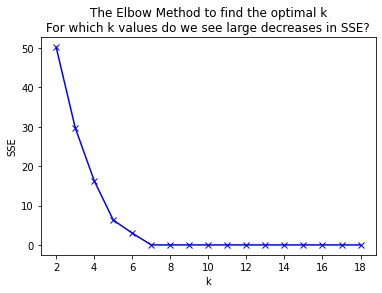

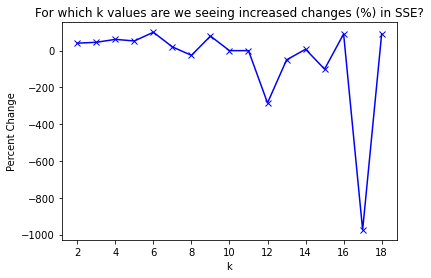

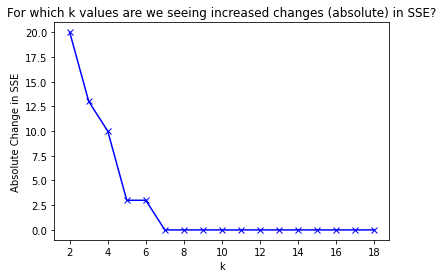

,k,sse,delta,pct_delta
0,2,5.016457e+01,20.0,40.6
1,3,2.977291e+01,13.0,45.3
2,4,1.627920e+01,10.0,61.2
3,5,6.323614e+00,3.0,52.7
4,6,2.990281e+00,3.0,100.0
5,7,9.032746e-29,0.0,20.2
6,8,7.212160e-29,-0.0,-25.5
7,9,9.049714e-29,0.0,79.2
8,10,1.880940e-29,0.0,0.0
9,11,1.880940e-29,0.0,0.0


In [50]:
find_k(X_train_scaled, cluster_variables, k_range)

In [51]:
k = 7
def create_clusters(X_train_scaled, k, cluster_variables):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 333)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train_scaled[cluster_variables])

    return kmeans

In [52]:
kmeans = create_clusters(X_train_scaled, k, cluster_variables)

In [53]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_variables, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_variables]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [54]:
centroid_df = get_centroids(kmeans, cluster_variables, cluster_name)

In [55]:
centroid_df

,oldschool_gb_puzzle,centroid_platform_GB,centroid_genre_Puzzle,centroid_publisher_Nintendo
0,0,8.326673e-17,-9.020562e-17,2.498002e-16
1,1,3.469447e-18,0.000000e+00,1.000000e+00
2,2,0.000000e+00,1.000000e+00,1.000000e+00
3,3,1.000000e+00,0.000000e+00,1.000000e+00
4,4,1.000000e+00,1.000000e+00,1.000000e+00
5,5,0.000000e+00,1.000000e+00,0.000000e+00
6,6,1.000000e+00,0.000000e+00,0.000000e+00


In [56]:
X_train_scaled

,eu_sales,jp_sales,other_sales,combined_sales,over_five_mill,age_bins_middle_aged,age_bins_noob,platform_3DS,platform_DC,platform_DS,...,publisher_Unknown,publisher_Valve,publisher_Valve Software,publisher_Video System,publisher_Virgin Interactive,publisher_Vivendi Games,publisher_Warner Bros. Interactive Entertainment,publisher_Westwood Studios,publisher_Zoo Digital Publishing,publisher_Zoo Games
0,-0.352113,-0.053691,-0.571429,-0.631313,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.605634,3.248322,-0.619048,0.419192,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.112676,-0.080537,-0.238095,-0.237374,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.253521,-0.080537,0.380952,-0.005051,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.084507,-0.080537,-0.095238,-0.348485,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.154930,0.402685,0.047619,0.035354,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,-0.647887,-0.080537,-0.619048,-0.863636,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,-0.154930,-0.080537,-0.047619,-0.388889,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,0.563380,0.000000,0.333333,0.237374,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# label cluster for each observation in train (train in our X list of dataframes), 
# X_validate (validate), & X_test (test)

def assign_clusters(kmeans, cluster_variables, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_variables]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X

In [60]:
X = assign_clusters(kmeans, cluster_variables, cluster_name, centroid_df)

In [62]:
pd.DataFrame(X[0].groupby(['oldschool_gb_puzzle', 'centroid_platform_GB', 'centroid_genre_Puzzle', 
                           'centroid_publisher_Nintendo'])['oldschool_gb_puzzle'].count())

,,,,oldschool_gb_puzzle
oldschool_gb_puzzle,centroid_platform_GB,centroid_genre_Puzzle,centroid_publisher_Nintendo,
0,8.326673e-17,-9.020562e-17,2.498002e-16,923
1,3.469447e-18,0.000000e+00,1.000000e+00,164
2,0.000000e+00,1.000000e+00,1.000000e+00,10
3,1.000000e+00,0.000000e+00,1.000000e+00,17
4,1.000000e+00,1.000000e+00,1.000000e+00,5
5,0.000000e+00,1.000000e+00,0.000000e+00,14
6,1.000000e+00,0.000000e+00,0.000000e+00,3


,eu_sales,jp_sales,other_sales,combined_sales,over_five_mill,age_bins_middle_aged,age_bins_noob,platform_3DS,platform_DC,platform_DS,...,publisher_Virgin Interactive,publisher_Vivendi Games,publisher_Warner Bros. Interactive Entertainment,publisher_Westwood Studios,publisher_Zoo Digital Publishing,publisher_Zoo Games,oldschool_gb_puzzle,centroid_platform_GB,centroid_genre_Puzzle,centroid_publisher_Nintendo
0,-0.352113,-0.053691,-0.571429,-0.631313,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8.326673e-17,-9.020562e-17,2.498002e-16
1,-0.605634,3.248322,-0.619048,0.419192,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8.326673e-17,-9.020562e-17,2.498002e-16
2,0.112676,-0.080537,-0.238095,-0.237374,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8.326673e-17,-9.020562e-17,2.498002e-16
3,0.253521,-0.080537,0.380952,-0.005051,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8.326673e-17,-9.020562e-17,2.498002e-16
4,-0.084507,-0.080537,-0.095238,-0.348485,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8.326673e-17,-9.020562e-17,2.498002e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.154930,0.402685,0.047619,0.035354,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.000000e+00,0.000000e+00,1.000000e+00
1132,-0.647887,-0.080537,-0.619048,-0.863636,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.000000e+00,0.000000e+00,1.000000e+00
1133,-0.154930,-0.080537,-0.047619,-0.388889,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,1.000000e+00,0.000000e+00,0.000000e+00
1134,0.563380,0.000000,0.333333,0.237374,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,1.000000e+00,0.000000e+00,0.000000e+00


## We'll start with a k value of 7, then try 5, then 4)

In [ ]:
k=7
cluster_name = 'oldschool_gb_puzzle'
cluster_variables = ['platform_GB','genre_Puzzle','publisher_Nintendo']

# fit kmeans 
kmeans = create_clusters(train, k, cluster_variables)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)